<a href="https://colab.research.google.com/github/abhinav160/Mathematical-science/blob/main/maths_assigment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

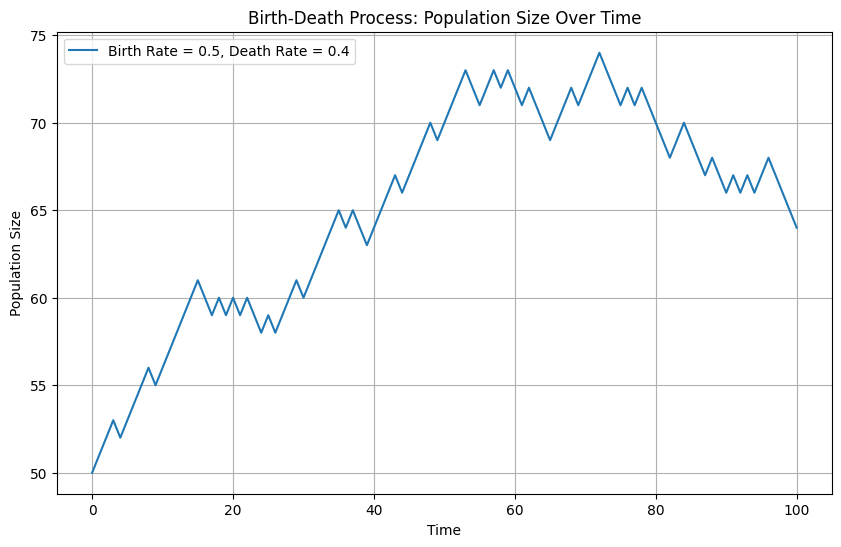

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_birth_death_process(initial_population, birth_rate, death_rate, time_steps):
    # Initialize the population size
    population = initial_population
    population_sizes = [population]
    times = [0]

    # Simulate the birth-death process
    for t in range(1, time_steps + 1):
        # Probability of birth or death
        birth_prob = birth_rate / (birth_rate + death_rate)
        death_prob = death_rate / (birth_rate + death_rate)

        # Random choice: 1 for birth, -1 for death
        event = np.random.choice([1, -1], p=[birth_prob, death_prob])

        # Update population size
        population += event

        # Ensure the population size is non-negative
        population = max(population, 0)

        # Store the population size and time
        population_sizes.append(population)
        times.append(t)

    return times, population_sizes

# Parameters
initial_population = 50  # Starting population
birth_rate = 0.5  # Birth rate (lambda)
death_rate = 0.4  # Death rate (mu)
time_steps = 100  # Total time steps

# Simulate the process
times, population_sizes = simulate_birth_death_process(initial_population, birth_rate, death_rate, time_steps)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(times, population_sizes, label=f"Birth Rate = {birth_rate}, Death Rate = {death_rate}")
plt.title("Birth-Death Process: Population Size Over Time")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

def stationary_distribution(birth_rate, death_rate, max_population):
    # Initialize an array to hold the stationary probabilities
    probabilities = np.zeros(max_population + 1)

    # Set the initial state probability P(0) to 1 (before normalization)
    probabilities[0] = 1.0

    # Compute the probability for each state using the product of birth/death ratios
    for n in range(1, max_population + 1):
        probabilities[n] = probabilities[n - 1] * (birth_rate / death_rate)

    # Normalize the probabilities so they sum to 1
    total_sum = np.sum(probabilities)
    probabilities /= total_sum

    return probabilities

# Parameters
birth_rate = 0.5  # Lambda
death_rate = 0.4  # Mu
max_population = 20  # Maximum population size to consider

# Calculate the stationary distribution
stationary_probs = stationary_distribution(birth_rate, death_rate, max_population)

# Display the stationary distribution
for n, prob in enumerate(stationary_probs):
    print(f"State {n}: Probability {prob:.4f}")


State 0: Probability 0.0023
State 1: Probability 0.0029
State 2: Probability 0.0036
State 3: Probability 0.0045
State 4: Probability 0.0057
State 5: Probability 0.0071
State 6: Probability 0.0089
State 7: Probability 0.0111
State 8: Probability 0.0139
State 9: Probability 0.0173
State 10: Probability 0.0217
State 11: Probability 0.0271
State 12: Probability 0.0339
State 13: Probability 0.0423
State 14: Probability 0.0529
State 15: Probability 0.0661
State 16: Probability 0.0827
State 17: Probability 0.1034
State 18: Probability 0.1292
State 19: Probability 0.1615
State 20: Probability 0.2019


In [ ]:
def expected_time_until_absorption(birth_rate, death_rate, initial_state):
    time_until_absorption = 0
    state = initial_state

    while state > 0:
        # Calculate the mean time for each state based on birth and death rates
        time_at_state = 1 / (birth_rate + death_rate)
        time_until_absorption += time_at_state
        # Probability of going to next state
        event = np.random.choice([1, -1], p=[birth_rate / (birth_rate + death_rate), death_rate / (birth_rate + death_rate)])
        state += event
        state = max(state, 0)  # Prevent negative population

    return time_until_absorption

# Parameters
initial_state = 10  # Start from this population
birth_rate = 0.5  # Lambda
death_rate = 0.4  # Mu

# Calculate the expected time until absorption
expected_time = expected_time_until_absorption(birth_rate, death_rate, initial_state)
print(f"Expected time until absorption: {expected_time:.2f}")


KeyboardInterrupt: 

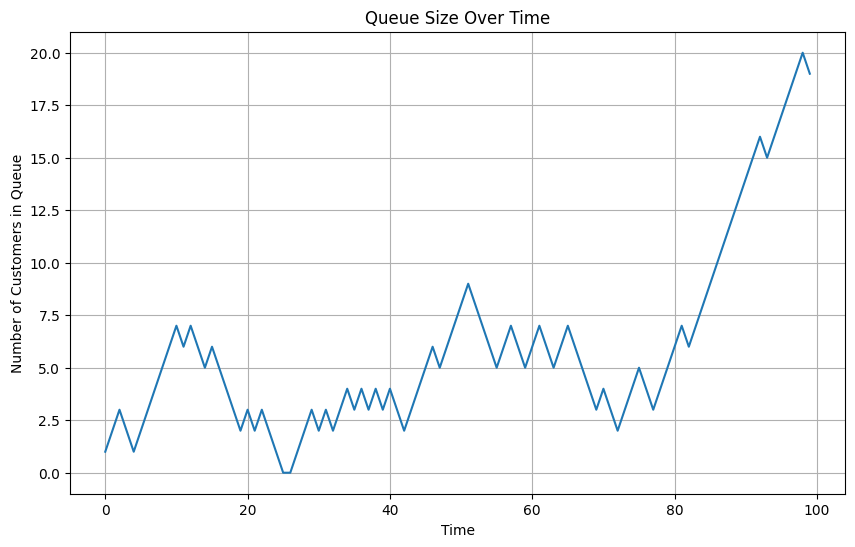

In [ ]:
def birth_death_queue(birth_rate, death_rate, time_steps):
    customers = 0
    queue_sizes = []

    for t in range(time_steps):
        # Random event for customer arrival (birth) or departure (death)
        event = np.random.choice([1, -1], p=[birth_rate / (birth_rate + death_rate), death_rate / (birth_rate + death_rate)])
        customers += event
        customers = max(0, customers)  # No negative customers in queue
        queue_sizes.append(customers)

    return queue_sizes

# Parameters
birth_rate = 0.6  # Lambda (arrival rate)
death_rate = 0.4  # Mu (service rate)
time_steps = 100  # Simulation steps

# Simulate queueing system
queue_sizes = birth_death_queue(birth_rate, death_rate, time_steps)

# Plotting the queue size over time
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps), queue_sizes)
plt.title("Queue Size Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Customers in Queue")
plt.grid(True)
plt.show()


In [ ]:
def expected_time_to_absorption(birth_rate, death_rate, states):
 expected_times = []
 for state in states:
 if birth_rate == death_rate:
 expected_time = state
 else:
 expected_time = (1 / (death_rate- birth_rate)) * state
 expected_times.append(expected_time)
 return expected_times
 # Example usage
 states = range(1, 10)
 birth_rate = 0.05
 death_rate = 0.1
 print(expected_time_to_absorption(birth_rate, death_rate,states))

IndentationError: expected an indented block after 'for' statement on line 3 (<ipython-input-7-e1e78f53ec9d>, line 4)

In [ ]:
def probability_reaching_state(birth_rate, death_rate, target_state, initial_state, time_steps):
    state = initial_state
    target_reached = 0

    for t in range(time_steps):
        event = np.random.choice([1, -1], p=[birth_rate / (birth_rate + death_rate), death_rate / (birth_rate + death_rate)])
        state += event
        state = max(0, state)

        if state == target_state:
            target_reached += 1

    return target_reached / time_steps

# Parameters
initial_state = 10
target_state = 5
birth_rate = 0.5
death_rate = 0.4
time_steps = 10000

# Calculate the probability of reaching the target state
probability = probability_reaching_state(birth_rate, death_rate, target_state, initial_state, time_steps)
print(f"Probability of reaching state {target_state}: {probability:.4f}")


Probability of reaching state 5: 0.0005


In [ ]:
def mean_and_variance(birth_rate, death_rate, max_population):
    stationary_probs = stationary_distribution(birth_rate, death_rate, max_population)

    mean = np.sum([n * prob for n, prob in enumerate(stationary_probs)])
    variance = np.sum([((n - mean) ** 2) * prob for n, prob in enumerate(stationary_probs)])

    return mean, variance

# Parameters
birth_rate = 0.5
death_rate = 0.4
max_population = 20

# Calculate mean and variance
mean, variance = mean_and_variance(birth_rate, death_rate, max_population)
print(f"Mean: {mean:.4f}, Variance: {variance:.4f}")


Mean: 16.1955, Variance: 15.8564


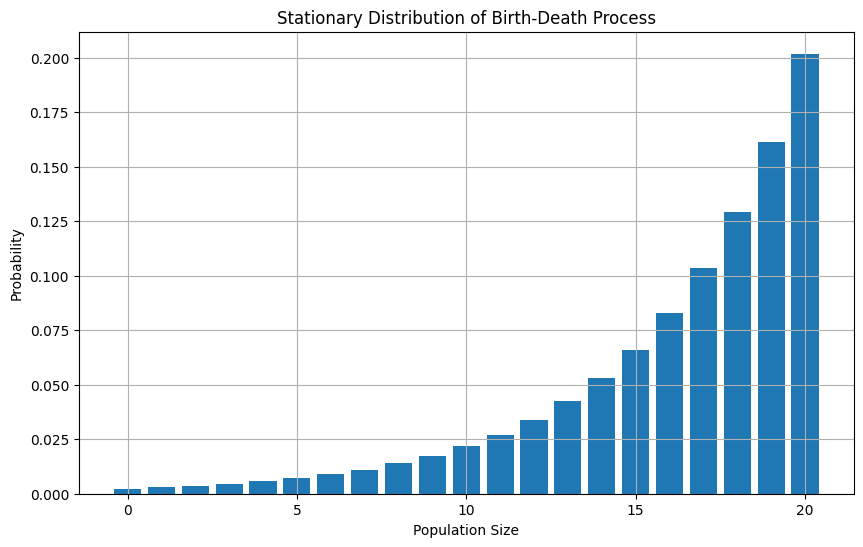

In [ ]:
def visualize_stationary_distribution(birth_rate, death_rate, max_population):
    stationary_probs = stationary_distribution(birth_rate, death_rate, max_population)

    plt.figure(figsize=(10, 6))
    plt.bar(range(max_population + 1), stationary_probs)
    plt.title("Stationary Distribution of Birth-Death Process")
    plt.xlabel("Population Size")
    plt.ylabel("Probability")
    plt.grid(True)
    plt.show()

# Parameters
birth_rate = 0.5
death_rate = 0.4
max_population = 20

# Visualize the stationary distribution
visualize_stationary_distribution(birth_rate, death_rate, max_population)


In [ ]:
def multiple_runs_simulation(birth_rate, death_rate, max_population, runs):
    results = np.zeros(max_population + 1)

    for _ in range(runs):
        _, population_sizes = simulate_birth_death_process(50, birth_rate, death_rate, 100)
        final_state = population_sizes[-1]
        results[final_state] += 1

    return results / runs

# Parameters
birth_rate = 0.5
death_rate = 0.4
runs = 1000
max_population = 20

# Simulate and calculate empirical distribution
empirical_probs = multiple_runs_simulation(birth_rate, death_rate, max_population, runs)
print(empirical_probs)


IndexError: index 52 is out of bounds for axis 0 with size 21

In [ ]:
def expected_population_at_time(birth_rate, death_rate, initial_population, time_steps):
    population_sum = 0

    for _ in range(1000):  # Repeat the simulation multiple times to estimate the expectation
        times, population_sizes = simulate_birth_death_process(initial_population, birth_rate, death_rate, time_steps)
        population_sum += population_sizes[-1]

    return population_sum / 1000

# Parameters
initial_population = 10
birth_rate = 0.5
death_rate = 0.4
time_steps = 100

# Calculate expected population at time t
expected_population = expected_population_at_time(birth_rate, death_rate, initial_population, time_steps)
print(f"Expected population at time {time_steps}: {expected_population:.2f}")


Expected population at time 100: 21.71


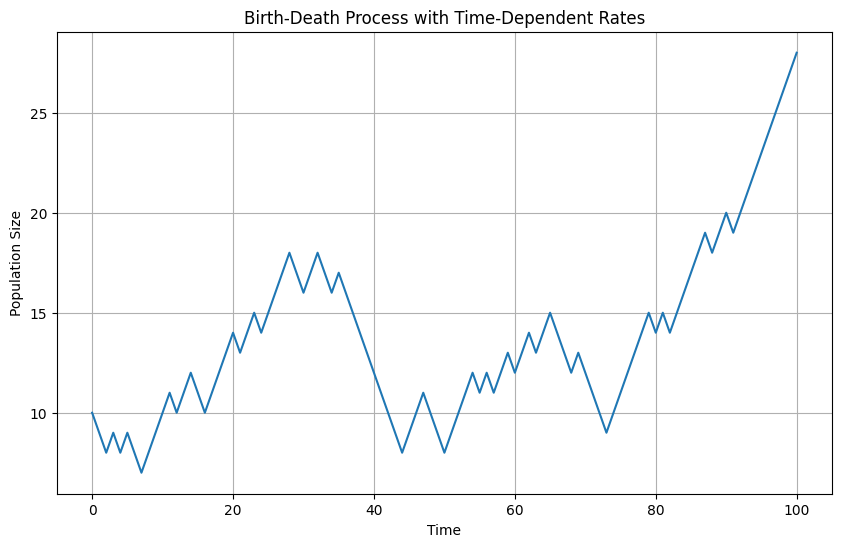

In [ ]:
def simulate_time_dependent_process(initial_population, birth_rate_func, death_rate_func, time_steps):
    population = initial_population
    population_sizes = [population]

    for t in range(1, time_steps + 1):
        birth_rate = birth_rate_func(t)
        death_rate = death_rate_func(t)

        event = np.random.choice([1, -1], p=[birth_rate / (birth_rate + death_rate), death_rate / (birth_rate + death_rate)])
        population += event
        population = max(0, population)
        population_sizes.append(population)

    return population_sizes

# Time-dependent birth and death rates (example: oscillating rates)
def birth_rate_func(t):
    return 0.5 + 0.1 * np.sin(0.1 * t)

def death_rate_func(t):
    return 0.4 + 0.1 * np.cos(0.1 * t)

# Parameters
initial_population = 10
time_steps = 100

# Simulate the process with time-dependent rates
population_sizes = simulate_time_dependent_process(initial_population, birth_rate_func, death_rate_func, time_steps)

# Plot the population over time
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps + 1), population_sizes)
plt.title("Birth-Death Process with Time-Dependent Rates")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.grid(True)
plt.show()


In [ ]:
def expected_time_until_absorption(birth_rate, death_rate, initial_state, max_state):
    # Initialize an array to hold expected times for each state
    expected_times = np.zeros(max_state + 1)

    # We know that the expected time at state 0 is zero (absorbing state)
    expected_times[0] = 0

    # Compute expected times for each state iteratively
    for state in range(1, max_state + 1):
        expected_times[state] = (1 + birth_rate * expected_times[state - 1] / (birth_rate + death_rate))

    return expected_times[initial_state]

# Parameters
birth_rate = 0.5  # Lambda
death_rate = 0.4  # Mu
initial_state = 10  # Starting state
max_state = 20  # The largest state to consider

# Calculate the expected time until absorption
expected_time = expected_time_until_absorption(birth_rate, death_rate, initial_state, max_state)
print(f"Expected time until absorption starting from state {initial_state}: {expected_time:.2f}")


Expected time until absorption starting from state 10: 2.24


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_birth_death_process(initial_population, birth_rate, death_rate, time_steps):
    population = initial_population
    population_history = [population]

    for t in range(time_steps):
        # Random event for birth (+1) or death (-1)
        event = np.random.choice([1, -1], p=[birth_rate / (birth_rate + death_rate), death_rate / (birth_rate + death_rate)])
        population += event
        population = max(0, population)  # Ensure population doesn't go negative
        population_history.append(population)

    return population_history

def multiple_runs_simulation(birth_rate, death_rate, max_population, time_steps, runs):
    # Array to store the frequency of final population states
    final_state_counts = np.zeros(max_population + 1)

    for _ in range(runs):
        # Simulate one birth-death process run
        population_history = simulate_birth_death_process(initial_population=10, birth_rate=birth_rate, death_rate=death_rate, time_steps=time_steps)
        final_population = population_history[-1]

        # Update the frequency of the final population state
        final_state_counts[final_population] += 1

    # Compute the empirical probabilities
    empirical_probabilities = final_state_counts / runs

    return empirical_probabilities

# Parameters
birth_rate = 0.5
death_rate = 0.4
time_steps = 100  # Number of steps in each simulation
runs = 1000  # Number of simulation runs
max_population = 20  # Maximum population size to consider

# Simulate multiple runs and calculate empirical distribution
empirical_probs = multiple_runs_simulation(birth_rate, death_rate, max_population, time_steps, runs)

# Display the empirical probability distribution
print(f"Empirical Probability Distribution: {empirical_probs}")

# Plot the empirical probability distribution
plt.figure(figsize=(10, 6))
plt.bar(range(max_population + 1), empirical_probs)
plt.title("Empirical Probability Distribution of Birth-Death Process")
plt.xlabel("Population Size")
plt.ylabel("Empirical Probability")
plt.grid(True)
plt.show()


IndexError: index 34 is out of bounds for axis 0 with size 21